# More Distributions and Central Limit Theorem

---

## Import Libraries

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

## Loading Datasets

In [2]:
# Dataset
amir_deals = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/amir_deals.csv', index_col = 0)

In [3]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [4]:
amir_deals.shape

(178, 5)

## The Normal Distribution

---

**Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.**

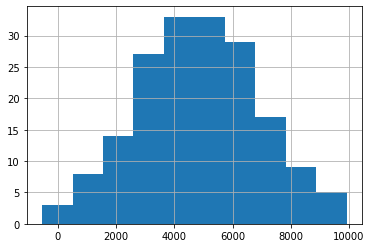

In [5]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()

#### Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of **amir_deals** and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

**1. What's the probability of Amir closing a deal worth less than $7500?**

In [6]:
from scipy.stats import norm

In [10]:
# norm.cdf(mean, std, value)
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print("The Probability of Amir closing a deal worth less than 7500 is " + str(round(prob_less_7500, 2)))

The Probability of Amir closing a deal worth less than 7500 is 0.89


**2. What's the probability of Amir closing a deal worth more than $1000?**

In [12]:
# norm.cdf(mean, std, value)
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print("The probability of Amir closing a deal worth more than 1000 is " + str(round(prob_over_1000, 2)))

The probability of Amir closing a deal worth more than 1000 is 0.98


**3. What's the probability of Amir closing a deal worth between $3000 and $7000?**

In [14]:
# Probability of deal between 3000 and 7000
# norm.cdf(mean, std, value)
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

0.6826894921370859


**4. What amount will 25% of Amir's sales be less than?**

In [15]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


---

#### Simulating Sales Under New Market Conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame.

**1. Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean**

In [16]:
# Calculate new average amount
new_mean = 5000 * 1.2

**2. Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.**

In [17]:
# Calculate new standard deviation
new_sd = 2000 * 1.3

**3. Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.**

In [18]:
# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

**4. Plot the distribution of the new_sales amounts using a histogram and show the plot.**

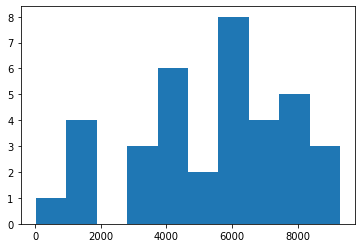

In [19]:
# Create histogram and show
plt.hist(new_sales)
plt.show()

Successful simulating! Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation

---

## The Central Limit Theorem

### Rolling The Dice Five Times

In [3]:
die = pd.Series([1, 2, 3, 4, 5, 6])

**Roll 5 times with replacement**

In [8]:
# np.random.seed(5)
samp_5 = die.sample(5, replace = True)
print(samp_5)

4    5
3    4
0    1
0    1
4    5
dtype: int64


In [9]:
sample_means = []

for i in range(10):
    samp_5 = die.sample(5, replace = True)
    sample_means.append(np.mean(samp_5))

In [10]:
print(sample_means)

[3.6, 4.6, 2.4, 2.8, 3.0, 3.6, 3.0, 5.2, 3.8, 3.6]


#### Sampling distributions

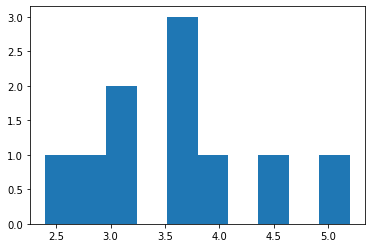

In [12]:
plt.hist(sample_means)
plt.show()

In [13]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace = True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[46.6, 47.8, 54.85, 43.6, 43.55, 28.2, 35.3, 39.3, 36.35, 27.9, 38.05, 39.45, 44.65, 34.9, 36.8, 34.4, 37.75, 41.7, 34.35, 34.85, 45.45, 36.5, 40.8, 35.75, 37.7, 37.05, 37.35, 36.0, 47.35, 43.1, 46.9, 38.35, 38.0, 36.0, 32.7, 37.4, 38.25, 35.55, 37.05, 30.1, 40.85, 37.25, 36.95, 43.25, 37.8, 27.55, 28.35, 40.3, 37.4, 33.5, 36.2, 47.45, 34.0, 37.1, 37.35, 47.35, 37.05, 40.55, 42.2, 42.2, 40.5, 33.8, 43.45, 33.25, 35.65, 31.95, 46.6, 31.85, 29.7, 34.8, 38.2, 42.1, 39.65, 47.3, 41.1, 35.25, 36.3, 40.75, 38.45, 37.8, 40.45, 29.15, 40.3, 38.3, 31.25, 40.25, 43.5, 41.15, 39.95, 33.2, 35.0, 35.2, 52.75, 40.1, 39.0, 34.95, 33.6, 29.8, 41.55, 35.3]


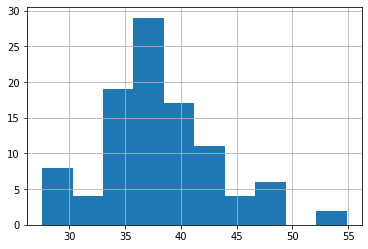

In [14]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [15]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals["num_users"].sample(20, replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(sample_means)

[40.95, 32.6, 40.3, 21.85, 45.2, 37.2, 36.0, 46.35, 34.95, 34.5, 40.65, 40.55, 34.8, 38.95, 37.7, 29.3, 49.85, 42.8, 38.85, 35.4, 38.6, 44.25, 44.55, 42.9, 34.95, 36.3, 42.3, 47.7, 37.55, 36.8]


---

## The Poisson Distribution

### Probability of a single value

**If the average number of adoptions per week is 8, what is P(# adoptions in a week = 5)?**

In [16]:
from scipy.stats import poisson
poisson.pmf(5, 8)

0.09160366159257921

**If the average number of adoptions per week is 8, what is P(# adoptions in a week <= 5)?**

In [17]:
poisson.cdf(5, 8)

0.19123606207962532

### Sampling from poission Distribution

**10 different weeks and 8 adoptions per week**

In [18]:
poisson.rvs(8, size = 10)

array([9, 5, 9, 6, 8, 3, 3, 6, 9, 9])

### Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

**calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.**

In [20]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


**Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?**

In [21]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


**What's the probability that Amir responds to 2 or fewer leads in a day?**

In [22]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


**What's the probability that Amir responds to more than 10 leads in a day?**

In [23]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


### The Exponential Distribution

**What's the probability it takes Amir more than 4 hours to respond to a lead?**

In [25]:
# Import expon from scipy.stats
from scipy.stats import expon

In [26]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale = 2.5))

0.20189651799465536


**What's the probability it takes Amir 3-4 hours to respond to a lead?**

In [27]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))

0.09929769391754684
